In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.info()
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\karti\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


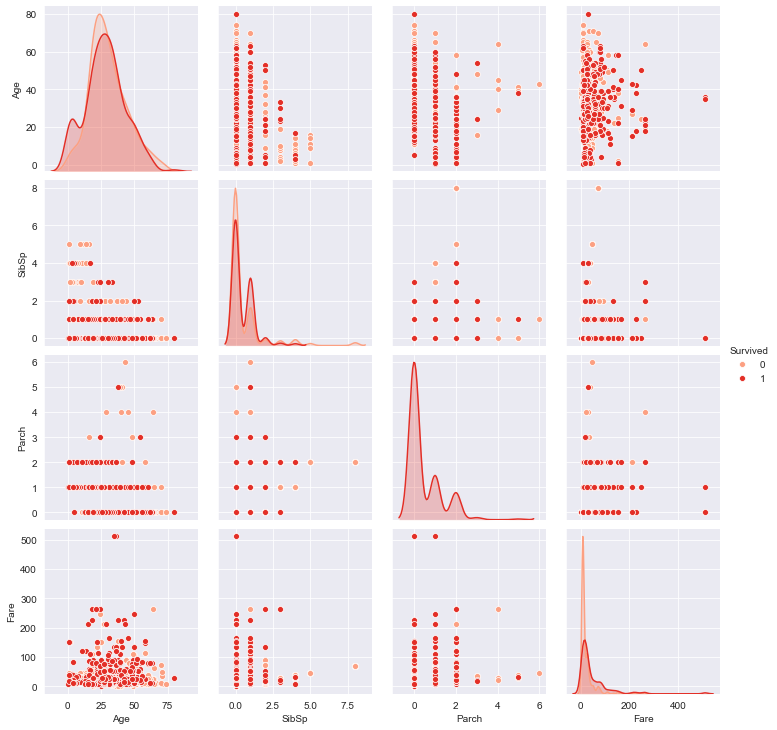

In [4]:
# separeate out numerical and categorical features

numerical_df = train_df[['Age', 'Survived', 'SibSp', 'Parch', 'Fare']]
categorical_df = train_df[['Ticket', 'Sex', 'Pclass', 'PassengerId', 'Name', 'Embarked', 'Cabin']]

sns.set_style('darkgrid')
sns.pairplot(numerical_df, hue='Survived', palette='Reds')

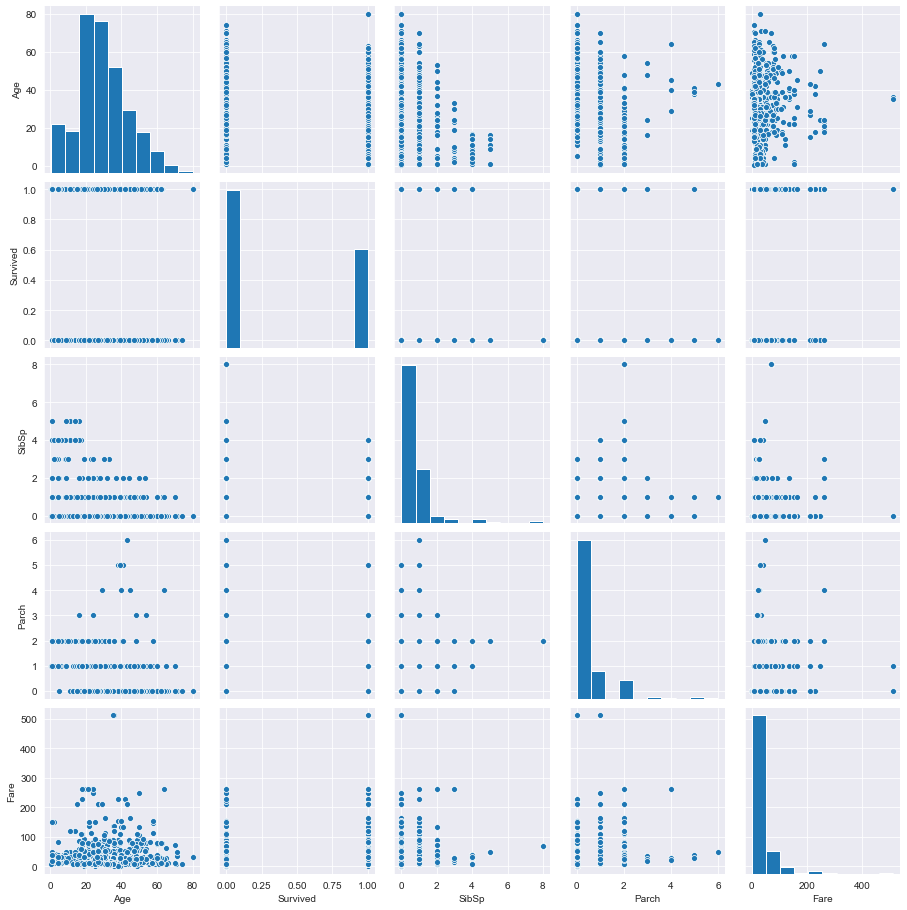

In [5]:
# separeate out numerical and categorical features

numerical_df = train_df[['Age', 'Survived', 'SibSp', 'Parch', 'Fare']]
categorical_df = train_df[['Ticket', 'Sex', 'Pclass', 'PassengerId', 'Name', 'Embarked', 'Cabin']]

sns.set_style('darkgrid')
sns.pairplot(numerical_df, palette='Reds')

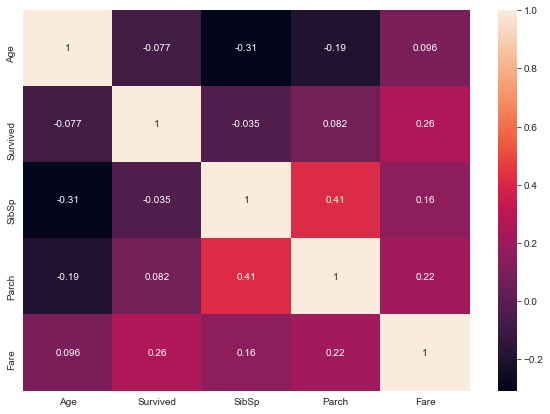

In [6]:
# find correlated features
plt.subplots(figsize=(10,7))
sns.heatmap(numerical_df.corr(), annot=True)

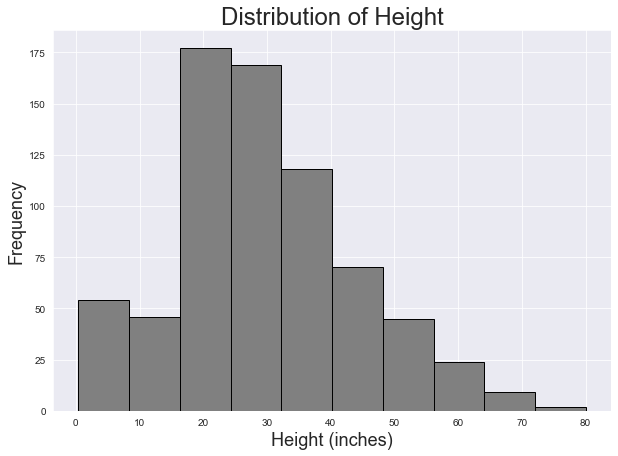

In [7]:
train_df.Age.plot(kind='hist', color='Grey', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

In [8]:
survival_sibcount = numerical_df.drop(['Age', 'Parch', 'Fare'], axis=1)
survival_sibcount

,Survived,SibSp
0,0,1
1,1,1
2,1,0
3,1,1
4,0,0
...,...,...
886,0,0
887,1,0
888,0,1
889,1,0


In [9]:
train_df['Embarked']=train_df['Embarked'].fillna('S')
train_df['Age']=train_df['Age'].fillna(train_df['Age'].median())


cleaned_df = train_df[['Age', 'SibSp', 'Parch', 'Fare', 'Ticket', 'Sex', 'Pclass', 'Embarked']]

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Ticket    891 non-null    object 
 5   Sex       891 non-null    object 
 6   Pclass    891 non-null    int64  
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [10]:
df_train_x = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]
df_train_x.head()

encoded_sex = {"male":1, "female":0}
df_train_x["Sex"] = df_train_x["Sex"].map(encoded_sex)
# df_train_x.head()

encoded_embarked = {"S":3, "C":2, "Q":3}
df_train_x["Embarked"] = df_train_x["Embarked"].map(encoded_embarked)
df_train_x.head(25)

# target
df_train_y = train_df['Survived']

<ipython-input-10-931238432794>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_x["Sex"] = df_train_x["Sex"].map(encoded_sex)
<ipython-input-10-931238432794>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_x["Embarked"] = df_train_x["Embarked"].map(encoded_embarked)


In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_train_x, df_train_y, test_size = 0.3, random_state=123)

x_test.count()

Pclass      268
Age         268
SibSp       268
Parch       268
Fare        268
Sex         268
Embarked    268
dtype: int64

In [12]:
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

In [13]:
first_model = tree.DecisionTreeClassifier()
first_model = first_model.fit(x_train, y_train)

In [14]:
pred_y = first_model.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_value = accuracy_score(y_test, pred_y)*100

print(accuracy_value)

77.61194029850746


In [17]:
classvfare_df = train_df[['Fare', 'Pclass']]
cvf_df = classvfare_df.groupby(['Pclass'])
cvf_df.describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [19]:
# enc = OneHotEncoder()
# df_tmp = pd.DataFrame(enc.fit.transform(train_df[['Embarked', 'Sex']]).toarray())
# df_train_x = df_train_x.join(df_tmp) 
# df_train_x.head()

AttributeError: 'function' object has no attribute 'transform'

In [20]:
df_train_x['AgeGroup']=pd.cut(df_train_x.Age,bins = [0,18,25,60,80],labels=['Child','Young Adults','Adults','Seniors'])
df_train_x['FamilySize'] = df_train_x['SibSp'] + df_train_x['Parch'] 

df_train_x['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

df_train_x['Married'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train_x['Married'] = df_train_x['Married'].replace(['Miss', 'Master', 'Mme', 'Ms', 'Mlle', 'Lady', 'Countess','Capt', 'Don', 'Col', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 0)
df_train_x['Married'] = df_train_x['Married'].replace(['Mr', 'Mrs'], 1)

df_train_x['Military'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train_x['Military'] = df_train_x['Military'].replace(['Miss', 'Mr', 'Mrs', 'Master', 'Mme', 'Ms', 'Mlle', 'Lady', 'Countess', 'Don', 'Dr', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 0)
df_train_x['Military'] = df_train_x['Military'].replace(['Capt', 'Col', 'Major'], 1)
                                                  
df_train_x = df_train_x.drop(columns=['Title'])                                     

df_train_x['Educated'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train_x['Educated'] = df_train_x['Educated'].replace(['Miss', 'Mr', 'Mrs', 'Master', 'Mme', 'Ms', 'Mlle', 'Lady', 'Countess', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 0)
df_train_x['Educated'] = df_train_x['Educated'].replace(['Capt', 'Col', 'Major', 'Dr', 'Don'], 1)

df_train_x['AgeGroup'] = df_train_x['AgeGroup'].replace(['Child'], 1)
df_train_x['AgeGroup'] = df_train_x['AgeGroup'].replace(['Young Adults'], 2)
df_train_x['AgeGroup'] = df_train_x['AgeGroup'].replace(['Adults'], 3)
df_train_x['AgeGroup'] = df_train_x['AgeGroup'].replace(['Seniors'], 4)




# Need to group for -
# Marriage (Mr.Mrs)
# Educated (just general)
# Military (Captain, etc)


df_train_x.head(35)

<ipython-input-20-1cdf67eddd7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_x['AgeGroup']=pd.cut(df_train_x.Age,bins = [0,18,25,60,80],labels=['Child','Young Adults','Adults','Seniors'])
<ipython-input-20-1cdf67eddd7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_x['FamilySize'] = df_train_x['SibSp'] + df_train_x['Parch']
<ipython-input-20-1cdf67eddd7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,AgeGroup,FamilySize,Married,Military,Educated
0,3,22.0,1,0,7.2500,1,3,2,1,1,0,0
1,1,38.0,1,0,71.2833,0,2,3,1,1,0,0
2,3,26.0,0,0,7.9250,0,3,3,0,0,0,0
3,1,35.0,1,0,53.1000,0,3,3,1,1,0,0
4,3,35.0,0,0,8.0500,1,3,3,0,1,0,0
5,3,28.0,0,0,8.4583,1,3,3,0,1,0,0
6,1,54.0,0,0,51.8625,1,3,3,0,1,0,0
7,3,2.0,3,1,21.0750,1,3,1,4,0,0,0
8,3,27.0,0,2,11.1333,0,3,3,2,1,0,0
9,2,14.0,1,0,30.0708,0,2,1,1,1,0,0


In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_train_x, df_train_y, test_size = 0.3, random_state=123)

x_test.count()

Pclass        268
Age           268
SibSp         268
Parch         268
Fare          268
Sex           268
Embarked      268
AgeGroup      268
FamilySize    268
Married       268
Military      268
Educated      268
dtype: int64

In [22]:
second_model = tree.DecisionTreeClassifier()
second_model = second_model.fit(x_train, y_train)
pred_y = second_model.predict(x_test)

accuracy_value2 = accuracy_score(y_test, pred_y)*100

print(accuracy_value2)

74.25373134328358


In [23]:
df_train_x['AgeGroup']=pd.cut(df_train_x.Age,bins = [0,18,25,60,80],labels=['Child','Young Adults','Adults','Seniors'])
df_train_x['FamilySize'] = df_train_x['SibSp'] + df_train_x['Parch'] 

df_train_x['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

df_train_x['Married'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train_x['Married'] = df_train_x['Married'].replace(['Miss', 'Master', 'Mme', 'Ms', 'Mlle', 'Lady', 'Countess','Capt', 'Don', 'Col', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 0)
df_train_x['Married'] = df_train_x['Married'].replace(['Mr', 'Mrs'], 1)

df_train_x['Military'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train_x['Military'] = df_train_x['Military'].replace(['Miss', 'Mr', 'Mrs', 'Master', 'Mme', 'Ms', 'Mlle', 'Lady', 'Countess', 'Don', 'Dr', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 0)
df_train_x['Military'] = df_train_x['Military'].replace(['Capt', 'Col', 'Major'], 1)
                                                  
df_train_x = df_train_x.drop(columns=['Title'])                                     


df_train_x['AgeGroup'] = df_train_x['AgeGroup'].replace(['Child'], 1)
df_train_x['AgeGroup'] = df_train_x['AgeGroup'].replace(['Young Adults'], 2)
df_train_x['AgeGroup'] = df_train_x['AgeGroup'].replace(['Adults'], 3)
df_train_x['AgeGroup'] = df_train_x['AgeGroup'].replace(['Seniors'], 4)

# df_train_x.head(35)

df_train_x['Educated'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train_x['Educated'] = df_train_x['Educated'].replace(['Miss', 'Mr', 'Mrs', 'Master', 'Mme', 'Ms', 'Mlle', 'Lady', 'Countess', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 0)
df_train_x['Educated'] = df_train_x['Educated'].replace(['Capt', 'Col', 'Major', 'Dr', 'Don'], 1)

selected_col = ['Pclass', 'Age', 'Fare', 'Sex', 'Embarked',
       'AgeGroup', 'FamilySize', 'Married', 'Military', 'Educated']

df_train_x = df_train_x[selected_col]

x_train,x_test,y_train,y_test = train_test_split(df_train_x, df_train_y, test_size = 0.3, random_state=123)

x_test.count()

third_model = tree.DecisionTreeClassifier()
third_model = third_model.fit(x_train, y_train)
pred_y = third_model.predict(x_test)

accuracy_value3 = accuracy_score(y_test, pred_y)*100

print(accuracy_value3)

75.74626865671642


In [24]:
# df_train_x.info()
df_train_x['Embarked'].unique()

array([3, 2], dtype=int64)

In [25]:
x_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize',
       'Married', 'Military', 'Educated'],
      dtype='object')